In [9]:
import pandas as pd
import numpy as np
import scipy as sp

import datetime

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA 

from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn import feature_selection
from sklearn.preprocessing import StandardScaler
from sklearn import random_projection

In [10]:
house_p = pd.read_csv("kc_house_data.csv")

house_p.drop(["date","id"], axis = 1,inplace = True)

house_p

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [11]:
# Expanding(Modifing)) with new better features
current_year = datetime.datetime.now().year
house_p["home_age"] = current_year - house_p["yr_built"]
house_p['is_renovated'] = house_p["yr_renovated"].where(house_p["yr_renovated"] == 0, 1)

house_p.drop(['yr_built','yr_renovated'], axis = 1, inplace = True)

# Generate subplots for paper

In [12]:
# for col in house_p.columns:
#     sns.set()
#     fig, ax = plt.subplots()
#     sns.set(style="ticks")
#     sns.boxplot(y=col, data=house_p,color="skyblue") 
#     sns.despine(offset=10, trim=True) 
#     fig.set_size_inches(22,14)
#     plt.savefig('plots/{}.png'.format(col), bbox_inches='tight')


# PREPROCESSING

## Removing Outliers using Z score

In [13]:
columns = ['bedrooms','bathrooms','price','sqft_above','sqft_basement','sqft_living','sqft_living15']
z_scores = sp.stats.zscore(house_p[columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
house_p_P = house_p[filtered_entries]

## Removing higly corelated atributes

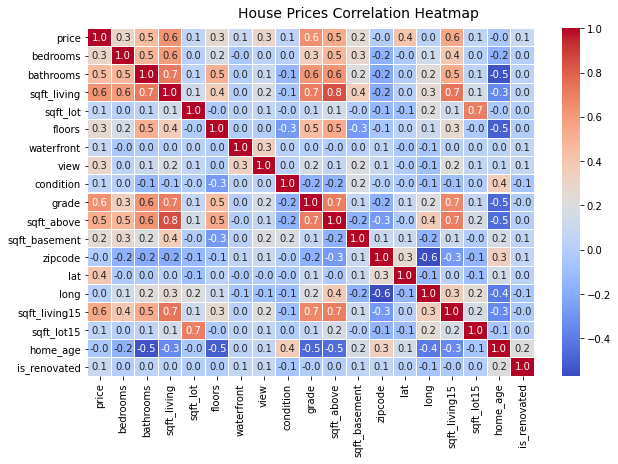

In [14]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = house_p_P.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.1f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('House Prices Correlation Heatmap', fontsize=14)
plt.savefig('plots/{}.png'.format('Corelation'), bbox_inches='tight')

#############################################################################
# Create correlation matrix
corr_matrix = house_p_P.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7 (>0.7 is considered high corelation)
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.75)]

# Drop features 
house_p_CP = house_p_P.drop(to_drop, axis=1)
#############################################################################

## Converting categorical to numerical

In [16]:
house_p_DCP = pd.get_dummies(house_p_CP, columns=['zipcode'])

# K Means 

## without standardisation

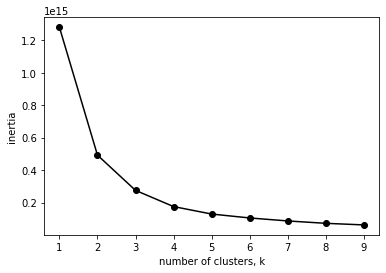

In [27]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k,random_state=7,algorithm='full')
    
    # Fit model to samples
    model.fit(house_p_DCP)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [28]:
model = KMeans(n_clusters=3,random_state=7)
model.fit(house_p_DCP)
labels_predicted = model.predict(house_p_DCP)

ss = metrics.silhouette_score(house_p_DCP, labels_predicted)
print("silhouette score is : ",ss)

silhouette score is :  0.5527555335599889


## with Standardisation

In [29]:
house_p_NDCP = StandardScaler().fit_transform(house_p_DCP)

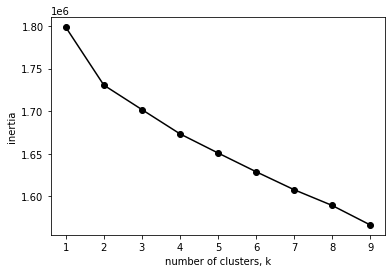

In [30]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k,random_state=7,algorithm='full')
    
    # Fit model to samples
    model.fit(house_p_NDCP)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [31]:
model = KMeans(n_clusters=9,random_state=7)
model.fit(house_p_NDCP)
labels_predicted = model.predict(house_p_NDCP)

ss = metrics.silhouette_score(house_p_NDCP, labels_predicted)
print("silhouette score is : ",ss)

silhouette score is :  0.015469718099614439


# Using PCA 

## without standardisation

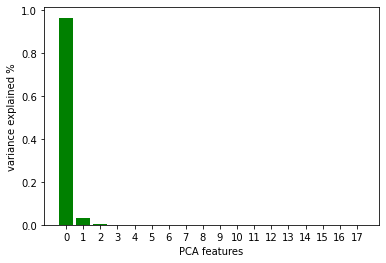

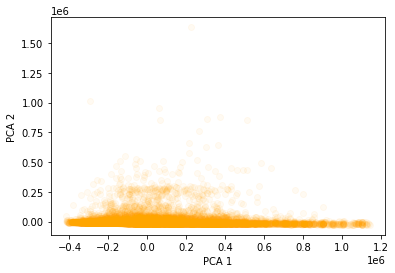

In [39]:
# Create a PCA instance
pca = PCA(n_components=house_p_CP.shape[1])
principalComponents = pca.fit_transform(house_p_CP)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance explained %')
plt.xticks(features)
plt.show()

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)


plt.scatter(PCA_components[0], PCA_components[1], alpha=.05, color='orange')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


## with standardisation

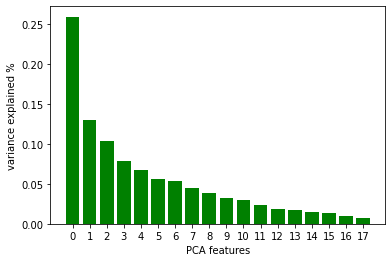

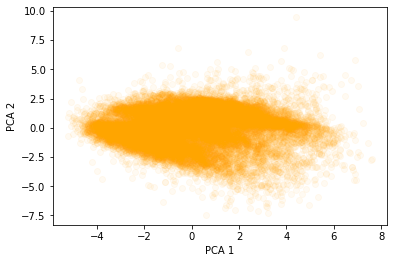

In [43]:
house_p_NCP = StandardScaler().fit_transform(house_p_CP)

# Create a PCA instance
pca = PCA(n_components=house_p_NCP.shape[1])
principalComponents = pca.fit_transform(house_p_NCP)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance explained %')
plt.xticks(features)
plt.show()

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)


plt.scatter(PCA_components[0], PCA_components[1], alpha=.05, color='orange')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [69]:
components = 0
clusters = 1

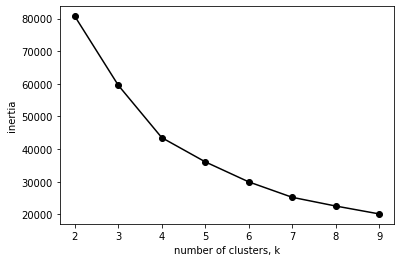

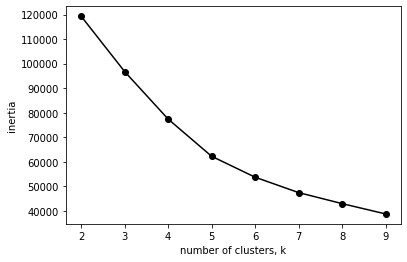

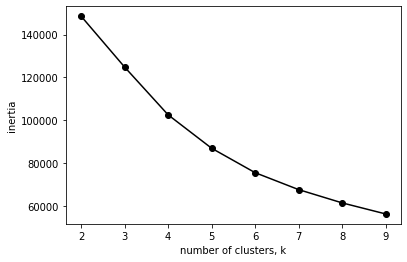

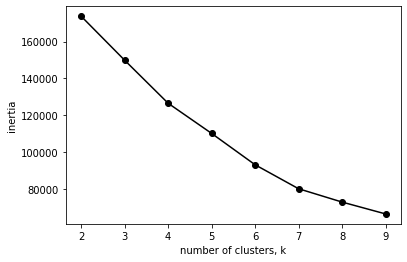

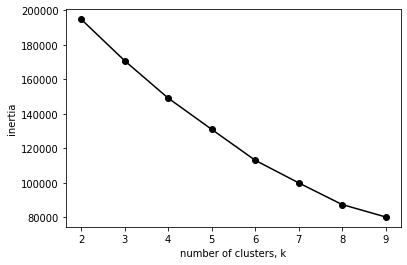

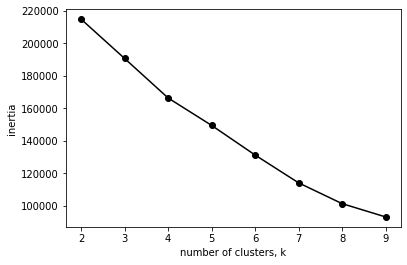

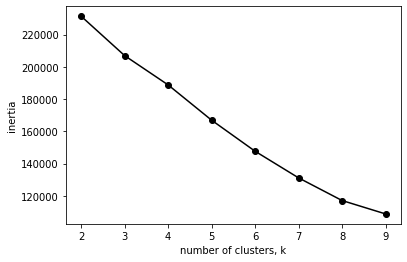

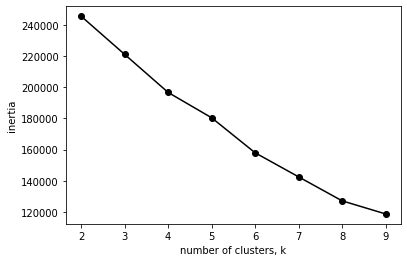

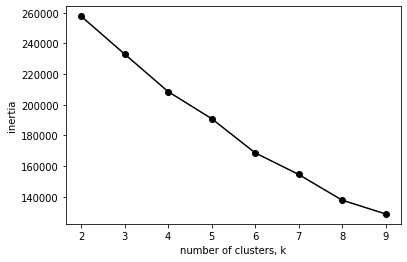

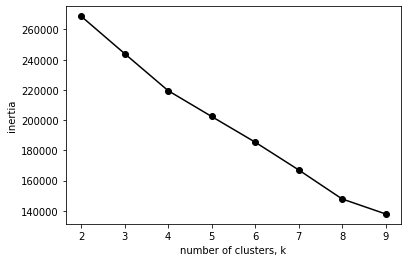

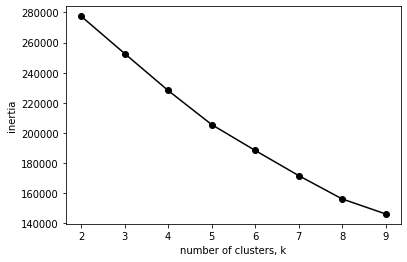

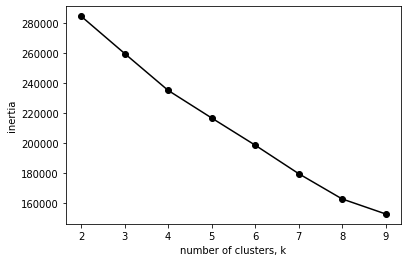

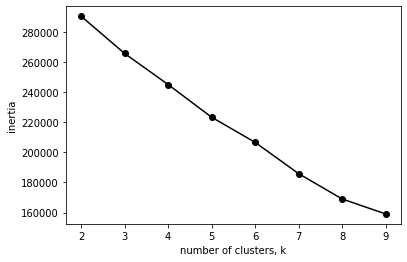

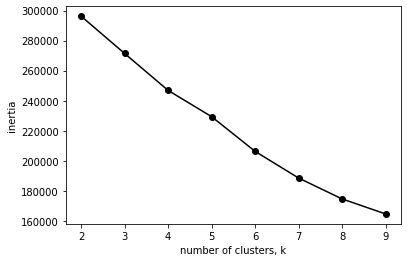

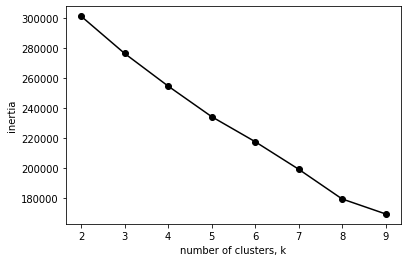

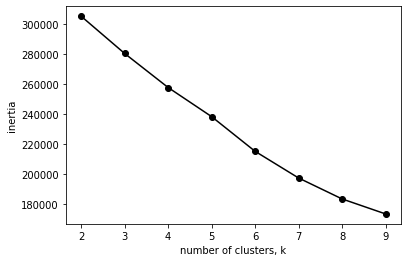

In [75]:
ks = range(2, 10)
cs = range(2, len(PCA_components.columns))

silhouette = -1
for c in range(2,len(PCA_components.columns)):
    inertias = []
    for k in ks:
        # Create a KMeans instance with k clusters: model
        model = KMeans(n_clusters=k, random_state=7)

        # Fit model to samples
        model.fit(PCA_components.iloc[:,:c])

        # Append the inertia to the list of inertias
        inertias.append(model.inertia_)
        
        # Calculate silhouette score
        labels_predicted = model.predict(PCA_components.iloc[:,:c])
        sil = metrics.silhouette_score(PCA_components.iloc[:,:c], labels_predicted)
        if sil > silhouette:
            silhouette = sil
            clusters = k
            components = c
    plt.plot(ks, inertias, '-o', color='black')
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

In [76]:
print("Best silhouette score is: {} with {} cluster and {} components".format(silhouette,clusters,components))

Best silhouette score is: 0.3928919746292781 with 2 cluster and 2 components


In [77]:
p_house_PCA = PCA_components.iloc[:,:components]
model = KMeans(n_clusters=clusters, random_state=7)
model.fit(p_house_PCA)
labels_predicted = model.predict(p_house_PCA)

metrics.silhouette_score(p_house_PCA, labels_predicted)

0.3928919746292781